<a href="https://colab.research.google.com/github/vin136/NN-foundations/blob/main/cs461_hw3_solutions_draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NOTE: Search for "### FILL IN ###" to find areas of problem that you are expected to work on.

# **PART A: LINEAR REGRESSION [60 POINTS]**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets

**Q1: Model fitting and prediction for Linear Regression [15 POINTS]**

The model parameters of Linear regression can be obtained by optimizing the RSS (residual sum of squares) w.r.t. $\beta$ : 

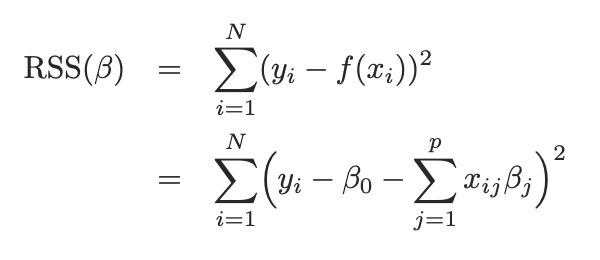


This optimization can be achieved by Gradient Ascent or by using the Closed Form solution directly. The Closed Form solution is as follows: 

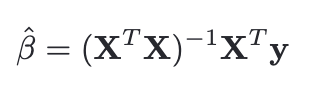

This implementation of Linear Regression adds a column of 1s to the input data matrix to account for the bias term, then computes the closed-form solution using the above equation, where $\beta$ is the vector of weights ($\beta_1 . . . . \beta_p$) and bias ($\beta_0$), and y is the vector of output values. The bias term is stored separately as the first element of beta, and the remaining elements correspond to the weights for the input features.

In [2]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        # modifying X to use (weights) and (bias) as a single (beta) term in the closed form solution
        # add a column of 1s to X for the bias term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        ### FILL IN ### [5 POINTS]
        # compute the closed-form solution
        self.betas = np.linalg.inv(X.T @ X) @ X.T @ y

        # extracting bias as beta_0 and remaining betas as the weights
        self.bias = self.betas[0]
        self.weights = self.betas[1:]
    

    def predict(self, X):
        # add a column of 1s to X for the bias term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        ### FILL IN ### [5 POINTS]
        # make predictions using the learned weights and bias
        y_predicted = X @ np.concatenate([[self.bias], self.weights])

        return y_predicted


Using the LinearRegression class to fit a linear regression model on the Diabetes dataset, which is a commonly used dataset in machine learning for regression tasks. 

The dataset contains 442 samples (N=442), each with 10 input features (p=10) and an output variable.

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
### looking at first 3 rows of dataset

print(diabetes.data[:3])
print("\n")
print(diabetes.target[:3])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]


[151.  75. 141.]


In [7]:
# load the diabetes dataset
X, y = diabetes.data, diabetes.target
print(X.shape)
print(y.shape)

(442, 10)
(442,)


This code loads the Diabetes dataset, splits it into train and test sets, creates an instance of the LinearRegression class, fits the model to the training data using the closed-form solution, makes predictions on the test data using the learned weights and bias.

**NOTE**: In this exercise we will use our test set as our validation set for finding the optimal value of lambda(as discussed in the class). Assume that the real testing dataset which we use to report the final model performance is unknown to us. In real life machine learning you do not have access to test data.

Here we evaluate the performance of the model using MSE (mean squared error), which is a common metric for regression tasks.

In [8]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an instance of the LinearRegression class
lr = LinearRegression()

# fit the model to the training data
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred = lr.predict(X_test)

# evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error (test): {mse}")

# also checking the error on training data
y_pred = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error (train): {mse}")


Mean squared error (test): 2900.1936284934795
Mean squared error (train): 2868.5497028355776


"### FILL IN ###" [5 POINTS]

Report the training and testing errors.

Answer: (test): 2900.1936284934795
(train): 2868.5497028355776.

**Q2: Model fitting and prediction for Ridge Regression [20 POINTS]**

In this implementation, we define a RidgeRegression class with a lambda parameter that controls the strength of regularization. In the fit method, we first add a bias term to the input data and then calculate the ridge regression coefficients using the closed-form solution:

$$ \widehat{\beta} = ({X}^T {X} + \lambda {I})^{-1} {X}^T {y}$$

where $X$ is the input data with the bias term added, $y$ is the output vector, and $\lambda$ is the regularization parameter.

In this exercise we do not split $\beta$ into <bias> and ```bias``` and ```weights``` as seen in earlier example. We consider ```betas``` as a single array of all model parameters $\beta_0 . . . . \beta_p$

In [9]:
class RidgeRegression:
    def __init__(self, lambdaa=0.1):
        self.lambdaa = lambdaa
        self.betas = None
        
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        ### FILL IN ### [5 POINTS]
        # compute the closed-form solution
        self.betas = np.linalg.inv(X.T @ X + self.lambdaa * np.eye(X.shape[1])) @ X.T @ y
        
    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1) 
        
        ### FILL IN ### [5 POINTS]
        # make predictions using the learned betas
        y_predicted = X @ self.betas

        return y_predicted

NOTE: Create an instance of the RidgeRegression class using above class with lambda taking values [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100].

You can use some code from Q1

In [10]:
### FILL IN ### [5 POINTS]
# Report the train and test error for each value of 8 lambdas
# What interesting can you note from the errors as we increase the lambda value ?

lr = RidgeRegression(100)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error (test): {mse}")

y_pred = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error (train): {mse}")

"""
[0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

Mean squared error (test): 2900.1936284934795
Mean squared error (train): 2868.5497028355776

Mean squared error (test): 2899.6798139329367
Mean squared error (train): 2868.55531515633

Mean squared error (test): 2895.825094075345
Mean squared error (train): 2868.9973493863567

Mean squared error (test): 2882.3289155849816
Mean squared error (train): 2879.1251823380258

Mean squared error (test): 2856.810366181945
Mean squared error (train): 2912.9733505914587

Mean squared error (test): 3076.955131013431
Mean squared error (train): 3387.9020630481946

Mean squared error (test): 4408.328454539778
Mean squared error (train): 5099.249670617114

Mean squared error (test): 5857.8051852382305
Mean squared error (train): 7088.800187165489

"""


Mean squared error (test): 5857.8051852382305
Mean squared error (train): 7088.800187165489


'\n[0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]\n\nMean squared error (test): 2900.1936284934795\nMean squared error (train): 2868.5497028355776\n\nMean squared error (test): 2899.6798139329367\nMean squared error (train): 2868.55531515633\n\nMean squared error (test): 2895.825094075345\nMean squared error (train): 2868.9973493863567\n\nMean squared error (test): 2882.3289155849816\nMean squared error (train): 2879.1251823380258\n\nMean squared error (test): 2856.810366181945\nMean squared error (train): 2912.9733505914587\n\nMean squared error (test): 3076.955131013431\nMean squared error (train): 3387.9020630481946\n\nMean squared error (test): 4408.328454539778\nMean squared error (train): 5099.249670617114\n\nMean squared error (test): 5857.8051852382305\nMean squared error (train): 7088.800187165489\n\n'

Answer: As lambda increases we get decreased weights and hence decreased influence from each feature.

"### FILL IN ###" [5 POINTS]

Run the code found below for 8 different lambdas. 

Is there anything interesting that you can note about the model parameters ```betas``` by varying lambda ? 

Answer: Sparser model as lambda increases. 4 out of 10 betas diminsh when lambda is 100.

In [11]:
np.set_printoptions(suppress=True)
for i in [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    lr = RidgeRegression(i)
    lr.fit(X_train, y_train)
    print(i, "\n",np.round(lr.betas,2))

0 
 [ 151.35   37.9  -241.96  542.43  347.7  -931.49  518.06  163.42  275.32
  736.2    48.67]
0.0001 
 [ 151.35   37.97 -241.9   542.59  347.6  -919.86  509.    158.21  273.69
  731.71   48.79]
0.001 
 [ 151.34   38.48 -241.35  543.84  346.78 -827.7   437.17  116.95  260.76
  696.13   49.74]
0.01 
 [ 151.33   40.7  -237.01  546.16  341.81 -430.15  129.9   -60.46  203.99
  541.1    55.49]
0.1 
 [ 151.42   42.88 -205.5   505.11  317.1  -108.51  -86.26 -190.37  151.7
  392.3    79.93]
1 
 [ 151.81   45.47  -76.68  291.45  199.04   -0.6   -28.67 -144.56  119.25
  230.28  112.27]
10 
 [149.13  18.42  -3.26  65.35  48.36  16.15  10.74 -39.33  41.47  58.1
  39.6 ]
100 
 [119.76   2.58   0.06   7.89   5.92   2.42   1.8   -4.95   5.44   7.21
   5.25]


**Q3: Model fitting and prediction for LASSO Regression [25 POINTS]**

In general, the LASSO lacks a closed form solution because the objective function is not differentiable.

This implementation uses scikit-learn's Lasso class, which applies L1 regularization to the model parameters. The alpha parameter is responsible for regularization.

In [12]:
from sklearn.linear_model import Lasso

NOTE: Create an instance of the Lasso class using above imported library with lambda taking values [0.0001, 0.001, 0.01, 0.1, 1, 10, 100].

You can use some code from Q1

In [13]:
### FILL IN ### [5 POINTS]
# Report the train and test error for each value of 7 lambdas
# What interesting can you note from the errors as we increase the lambda value ?

lr = Lasso(100)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error (test): {mse}")

y_pred = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error (train): {mse}")

"""
Mean squared error (test): 2899.803356085326
Mean squared error (train): 2868.5515823952846

Mean squared error (test): 2896.4097872031953
Mean squared error (train): 2868.737582663929

Mean squared error (test): 2878.559386186607
Mean squared error (train): 2877.0810201119007

Mean squared error (test): 2798.193485169719
Mean squared error (train): 2935.25823259759

Mean squared error (test): 3403.5757216070733
Mean squared error (train): 3860.7549830123576

Mean squared error (test): 5361.533457238513
Mean squared error (train): 6076.398012984615

Mean squared error (test): 5361.533457238513
Mean squared error (train): 6076.398012984615
"""

Mean squared error (test): 5361.533457238513
Mean squared error (train): 6076.398012984615


'\nMean squared error (test): 2899.803356085326\nMean squared error (train): 2868.5515823952846\n\nMean squared error (test): 2896.4097872031953\nMean squared error (train): 2868.737582663929\n\nMean squared error (test): 2878.559386186607\nMean squared error (train): 2877.0810201119007\n\nMean squared error (test): 2798.193485169719\nMean squared error (train): 2935.25823259759\n\nMean squared error (test): 3403.5757216070733\nMean squared error (train): 3860.7549830123576\n\nMean squared error (test): 5361.533457238513\nMean squared error (train): 6076.398012984615\n\nMean squared error (test): 5361.533457238513\nMean squared error (train): 6076.398012984615\n'

Answer: 


1) As lambda increases, the the train error increases.
2) As lambda increase, the test error initially decreases upto certain points and increases.

From this we can understand that increasing lambda leads to higher regularization. This results to simpler model which is less prone to overfitting the training data. 

"### FILL IN ###" [5 POINTS]

Run the code found below for 7 different lambdas. 

Is there anything interesting that you can note about the model parameters ```betas``` by varying lambda ? 

Answer: Sparser model as lambda increases. all 10 betas diminsh when lambda reaches 10.

In [14]:
### report the beta values
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    lr = Lasso(i)
    lr.fit(X_train, y_train)
    print(i, "\n",np.round(lr.coef_,2))


0.0001 
 [  37.89 -241.88  542.52  347.62 -924.83  513.03  160.22  274.04  733.76
   48.69]
0.001 
 [  37.78 -241.1   543.39  346.91 -864.93  467.78  131.47  262.5   711.84
   48.86]
0.01 
 [  35.35 -231.91  551.3   341.31 -483.57  165.99  -25.83  216.88  566.82
   49.7 ]
0.1 
 [   0.   -152.66  552.7   303.37  -81.37   -0.   -229.26    0.    447.92
   29.64]
1 
 [  0.    -0.   413.43  34.83   0.     0.    -0.     0.   258.15   0.  ]
10 
 [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
100 
 [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]


"### FILL IN ###" [3 POINTS]

How do you decide whether your linear regression model fits the data?

Answer: Using an evaluation metric (MSE, RMSE, MAE) on the hold out set and not on the training set.

<hr>

"### FILL IN ###" [3 POINTS]

In LASSO, what happens to the $i^{th}$ feature if its corresponding $\beta_i$ is zero ? 

Answer: Sparsity due to lesser features (parameter selection). Features are eliminated.

<hr>

"### FILL IN ###" [3 POINTS]

In LASSO, what happens to overall model in terms of complexity as compared to unregularized Linear Regression ? 

Answer: sparser model as few features zero so its simpler model.

<hr>

"### FILL IN ###" [3 POINTS]

What happens in Ridge regression when $\lambda$ is equal to zero ? 

Answer: Same as basic linear regression

<hr>

"### FILL IN ###" [3 POINTS]

Which regularization technique achieves both parameter selection and shrinkage ?

Answer: LASSO

<hr>


# **PART B: NEURAL NETWORKS [40 POINTS]**


Hyperparameters in a neural network model are parameters that are set prior to the training of the model and are not learned during the training process. They affect the behavior and performance of the model. The process of selecting the optimal hyperparameters is called hyperparameter tuning and is an important part of building an effective machine learning model.



Here are some common hyperparameters in a neural network model:

* Learning rate: This hyperparameter controls the step size of the optimizer during training. 

* Number of hidden layers: The number of hidden layers in a neural network model is a hyperparameter that determines the depth of the network. 

* Number of neurons per layer: This hyperparameter determines the width of the neural network model. 

* Activation function: The activation function is applied to the output of each neuron in a neural network model. Different activation functions can have different properties, such as being more or less sensitive to input or output values. Popular activation functions include ReLU, sigmoid, and tanh.

**Q4: Neural Network on Iris Dataset [20 POINTS]**

In this example, we're normalizing the input features to have zero mean and unit variance, which can help with training. We're also one-hot encoding the target variable, which is a common technique for training classification models.

In [15]:
iris = datasets.load_iris()

In [16]:
### looking at first 3 rows of dataset

print(iris.data[:3])
print("\n")
print(iris.target[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


[0 0 0]


**NOTE**: In this exercise we will use our test set as our validation set for finding the optimal value of our hyperparameters(as discussed in the class). Assume that the real testing dataset which we use to report the final model performance is unknown to us. In real life machine learning you do not have access to test data.

In [17]:
X = iris.data
y = iris.target

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize input features
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# one-hot encode target variable
y_train_onehot = np.zeros((len(y_train), 3))
y_train_onehot[np.arange(len(y_train)), y_train] = 1
y_test_onehot = np.zeros((len(y_test), 3))
y_test_onehot[np.arange(len(y_test)), y_test] = 1

In [18]:
X.shape, y.shape

((150, 4), (150,))

In [19]:
X_train.shape, y_train_onehot.shape

((120, 4), (120, 3))

In [20]:
X_test.shape, y_test_onehot.shape

((30, 4), (30, 3))

In this implementation, we define the NeuralNetwork class which takes four arguments as input: 
* input_size
* hidden_size
* output_size
* learning_rate

The forward() method performs forward propagation through the network

The backward() method performs backpropagation to compute gradients and update weights and biases

The train() method trains the network using the specified learning rate and number of epochs.

The sigmoid() method implements the sigmoid activation function, and the sigmoid_derivative() method implements the derivative of the sigmoid function, which is used in the backpropagation algorithm.

In [21]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        ### FILL IN ### [5 POINTS]
        # Initialize weights and biases
        np.random.seed(42)
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        np.random.seed(21)
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))
    
    def sigmoid(self, z):
        ### FILL IN ### [5 POINTS]
        sigmoid_output = 1 / (1 + np.exp(-z))
        return sigmoid_output
    
    def sigmoid_derivative(self, z):
        ### FILL IN ### [5 POINTS]
        sigmoid_derivative_output = self.sigmoid(z) * (1 - self.sigmoid(z))
        return sigmoid_derivative_output
    
    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        # Backward propagation
        self.error = y - output
        self.delta2 = self.error * self.sigmoid_derivative(self.z2)
        self.dW2 = np.dot(self.a1.T, self.delta2)
        self.db2 = np.sum(self.delta2, axis=0, keepdims=True)
        self.delta1 = np.dot(self.delta2, self.W2.T) * self.sigmoid_derivative(self.z1)
        self.dW1 = np.dot(X.T, self.delta1)
        self.db1 = np.sum(self.delta1, axis=0)
        
        ### FILL IN ### [5 POINTS]
        # Update weights and biases using the derivatives
        self.W2 += self.learning_rate * self.dW2
        self.b2 += self.learning_rate * self.db2
        self.W1 += self.learning_rate * self.dW1
        self.b1 += self.learning_rate * self.db1
    
    def train(self, X, y, X_test, y_test, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean(np.square(y - output))

            # evaluate on test set
            test_output = self.forward(X_test)
            test_loss = np.mean(np.abs(y_test - test_output))
            #test_accuracy = np.mean(np.argmax(test_output, axis=1) == y_test)

            if epoch%10==0:
                print("Epoch %d - train_loss: %.4f , test_loss: %.4f" % (epoch, loss, test_loss))



To use this neural network, we can create an instance of the NeuralNetwork class and train it on a dataset:

In [22]:
INPUT_SIZE = 4
HIDDEN_SIZE = 10
OUTPUT_SIZE = 3
LR = 0.001
EPOCHS = 500

nn = NeuralNetwork(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE, learning_rate=LR)

In [23]:
nn.train(X=X_train, y=y_train_onehot, X_test=X_test, y_test=y_test_onehot, epochs=EPOCHS)

Epoch 0 - train_loss: 0.2495 , test_loss: 0.4980
Epoch 10 - train_loss: 0.2383 , test_loss: 0.4857
Epoch 20 - train_loss: 0.2318 , test_loss: 0.4764
Epoch 30 - train_loss: 0.2280 , test_loss: 0.4694
Epoch 40 - train_loss: 0.2257 , test_loss: 0.4641
Epoch 50 - train_loss: 0.2244 , test_loss: 0.4600
Epoch 60 - train_loss: 0.2235 , test_loss: 0.4568
Epoch 70 - train_loss: 0.2230 , test_loss: 0.4544
Epoch 80 - train_loss: 0.2227 , test_loss: 0.4525
Epoch 90 - train_loss: 0.2225 , test_loss: 0.4510
Epoch 100 - train_loss: 0.2224 , test_loss: 0.4498
Epoch 110 - train_loss: 0.2223 , test_loss: 0.4488
Epoch 120 - train_loss: 0.2222 , test_loss: 0.4481
Epoch 130 - train_loss: 0.2222 , test_loss: 0.4475
Epoch 140 - train_loss: 0.2222 , test_loss: 0.4470
Epoch 150 - train_loss: 0.2222 , test_loss: 0.4466
Epoch 160 - train_loss: 0.2221 , test_loss: 0.4463
Epoch 170 - train_loss: 0.2221 , test_loss: 0.4460
Epoch 180 - train_loss: 0.2221 , test_loss: 0.4458
Epoch 190 - train_loss: 0.2221 , test_loss

**Q5: What if we vary the hyper parameters [20 POINTS]**

In [24]:
### FILL IN ### [4 POINTS]
# Report both the losses after 500 epochs for each of the 7 different values of learning rate. 
# Is there anything interesting that you note when you increase the learning rate ?

INPUT_SIZE = 4
HIDDEN_SIZE = 10
OUTPUT_SIZE = 3
EPOCHS = 500


for lr in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5]:
    print("*"*30)
    print("PROCEDURE FOR LR = ", lr)
    nn = NeuralNetwork(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE, learning_rate=lr)
    nn.train(X=X_train, y=y_train_onehot, X_test=X_test, y_test=y_test_onehot, epochs=EPOCHS)

******************************
PROCEDURE FOR LR =  1e-06
Epoch 0 - train_loss: 0.2495 , test_loss: 0.4994
Epoch 10 - train_loss: 0.2495 , test_loss: 0.4994
Epoch 20 - train_loss: 0.2495 , test_loss: 0.4994
Epoch 30 - train_loss: 0.2495 , test_loss: 0.4994
Epoch 40 - train_loss: 0.2495 , test_loss: 0.4994
Epoch 50 - train_loss: 0.2495 , test_loss: 0.4994
Epoch 60 - train_loss: 0.2495 , test_loss: 0.4994
Epoch 70 - train_loss: 0.2494 , test_loss: 0.4993
Epoch 80 - train_loss: 0.2494 , test_loss: 0.4993
Epoch 90 - train_loss: 0.2494 , test_loss: 0.4993
Epoch 100 - train_loss: 0.2494 , test_loss: 0.4993
Epoch 110 - train_loss: 0.2494 , test_loss: 0.4993
Epoch 120 - train_loss: 0.2494 , test_loss: 0.4993
Epoch 130 - train_loss: 0.2494 , test_loss: 0.4993
Epoch 140 - train_loss: 0.2493 , test_loss: 0.4992
Epoch 150 - train_loss: 0.2493 , test_loss: 0.4992
Epoch 160 - train_loss: 0.2493 , test_loss: 0.4992
Epoch 170 - train_loss: 0.2493 , test_loss: 0.4992
Epoch 180 - train_loss: 0.2493 , tes

Answer: No learning when LR>1

"### FILL IN ###" [4 POINTS]

What happens when the learning rate is too high, also what if it is too low?

Answer: A high learning rate can cause the optimizer to overshoot the minimum, while a low learning rate can cause slow convergence or the model to get stuck in a local minimum.

<hr>

"### FILL IN ###" [4 POINTS]

Which one of the seven learning rates (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5) is the most optimal ?

Answer: 0.01


<hr>


"### FILL IN ###" [4 POINTS]

State one advantage and one disadvantage of increasing the number of hidden layers and number of units in each hidden layer?

Answer: Adding more hidden layers can make the model more expressive and able to learn more complex functions, but can also increase the risk of overfitting. Increasing the number of neurons per layer can make the model more powerful, but also increases the risk of overfitting.

<hr>


"### FILL IN ###" [4 POINTS]

Using the most optimal learning rate, run the process for 100,250,500,750,1000,2000 epochs and report errors

Answer: 

Epoch 90 - train_loss: 0.1498 , test_loss: 0.4352

Epoch 240 - train_loss: 0.0958 , test_loss: 0.4325

Epoch 490 - train_loss: 0.0507 , test_loss: 0.3307

Epoch 740 - train_loss: 0.0240 , test_loss: 0.3877

Epoch 990 - train_loss: 0.0170 , test_loss: 0.4067

Epoch 1990 - train_loss: 0.0120 , test_loss: 0.4152


<hr>

In [25]:
### for epoch calculations
INPUT_SIZE = 4
HIDDEN_SIZE = 10
OUTPUT_SIZE = 3
lr = 0.01

for e in [100,250,500,750,1000,2000]:
    print("*"*30)
    print("PROCEDURE FOR EPOCH = ", e)
    nn = NeuralNetwork(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE, learning_rate=lr)
    nn.train(X=X_train, y=y_train_onehot, X_test=X_test, y_test=y_test_onehot, epochs=e)

******************************
PROCEDURE FOR EPOCH =  100
Epoch 0 - train_loss: 0.2495 , test_loss: 0.4852
Epoch 10 - train_loss: 0.2223 , test_loss: 0.4479
Epoch 20 - train_loss: 0.2221 , test_loss: 0.4453
Epoch 30 - train_loss: 0.2220 , test_loss: 0.4449
Epoch 40 - train_loss: 0.2214 , test_loss: 0.4443
Epoch 50 - train_loss: 0.2198 , test_loss: 0.4425
Epoch 60 - train_loss: 0.2145 , test_loss: 0.4382
Epoch 70 - train_loss: 0.2006 , test_loss: 0.4321
Epoch 80 - train_loss: 0.1753 , test_loss: 0.4304
Epoch 90 - train_loss: 0.1498 , test_loss: 0.4352
******************************
PROCEDURE FOR EPOCH =  250
Epoch 0 - train_loss: 0.2495 , test_loss: 0.4852
Epoch 10 - train_loss: 0.2223 , test_loss: 0.4479
Epoch 20 - train_loss: 0.2221 , test_loss: 0.4453
Epoch 30 - train_loss: 0.2220 , test_loss: 0.4449
Epoch 40 - train_loss: 0.2214 , test_loss: 0.4443
Epoch 50 - train_loss: 0.2198 , test_loss: 0.4425
Epoch 60 - train_loss: 0.2145 , test_loss: 0.4382
Epoch 70 - train_loss: 0.2006 , test

Some guidelines:

Breakdown of your ml model performance:

Imagine building an image classifier(cat vs dog)

Users upload images taken from their phones to your website and you output the label.

Collect some data(ask some users and manually label) = expensive but accurate(true production data). Use this as your test set.

Now we need training data = scrape the web and use heuristic rules say if the file name has  `cat.jpeg`, it's a cat.

Gotcha: potential distribution mismatch between train and test.

Step 1: 
Get a proxy for the best performance possible(there is always some irreducable error)

- `Human level performance`

Step 2

Train set | Validation set | Test set | Production perfomance


- Gap between train performance and human level performance = Bias in the model(proxy)

- Gap between Train perf and validation perf = Variance in the model(proxy)

- Gap between valid perf and test perf = dist mismatch.

- Gap between deployment and test perf = overfitting on the dev set.(typically)



Ultimate target = work well in deployment.


1. what if human level perf is pretty low ?

2. Human level perf is good but training error is high ?

3. Gap between valid and train perf is high ?

4. Gap between valid and test set is high ?

5. What does it mean if we have train acc = 80% and valid = 85% ?

6. Collecting data is expensive, can my errors indicate when to go about collecting more data ?

2 ans: Bias (inability to represte the best possible model by our hypothesis class)

- add features
- use a complex model
- reduce regularization

3 ans:

- small models
- increase regularization
- get more data [ you are doing well on train data but not generalizing well = not learning right pattern = collect more data and make it harder to fit thus possibly forcing to learn better patterns]

4 ans:

- use creativity.(upsampling etc)

5 ans

6.ans



on different fractions of data = measure the train error and test error. If the gap remained same or converging = No use in more data

else = collect more data (high -variance scenario)



## Initialization

[Heuristic](https://d2l.ai/chapter_multilayer-perceptrons/numerical-stability-and-init.html#xavier-initialization)

# PYTORCH INTRO

## Alternative to numpy



In [35]:
a = 1.
print(a)

1.0


In [36]:
#A single float number in PyTorch as a tensor type:

import torch

a = torch.tensor(1.)
print(a)

tensor(1.)


In [37]:
#Show the shape of the tensor (a scalar is a rank-0 tensor):
print(a.shape)

torch.Size([])


In [38]:
a = [1., 2., 3.]
print(a)

[1.0, 2.0, 3.0]


In [40]:
#A list of numbers as a PyTorch tensor (rank-1 tensor):

a = torch.tensor([1., 2., 3.])
print(a)

print(a.shape)

tensor([1., 2., 3.])
torch.Size([3])


In [42]:
a = torch.tensor([[1., 2., 3.],
                  [2., 3., 4.]])
a.shape

torch.Size([2, 3])

In [43]:
a = torch.tensor([[[1., 2., 3.],
                   [2., 3., 4.]],
                  [[5., 6., 7.],
                   [8., 9., 10.]]])
a.shape

torch.Size([2, 2, 3])

In [27]:


#1. Linalg for efficient code

b = 0.
x = [1.2, 2.2]
w = [3.3, 4.3]

output = b
for x_j, w_j in zip(x, w):
    output += x_j * w_j
    
print(output)

13.42


In [28]:
import torch

b = torch.tensor([0.])
x = torch.tensor([1.2, 2.2])
w = torch.tensor([3.3, 4.3])

x.dot(w) + b

tensor([13.4200])

Benchmark

In [29]:
def plain_python(x, w, b):
    output = b
    for x_j, w_j in zip(x, w):
        output += x_j * w_j
    return output

import random


random.seed(123)

b = 0.
x = [random.random() for _ in range(1000)]
w = [random.random() for _ in range(1000)]

In [30]:
%timeit plain_python(x, w, b)

129 µs ± 40 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
def pytorch_dot(x, w, b):
    return x.dot(w) + b

In [31]:
t_b = torch.tensor(b)
t_x = torch.tensor(x)
t_w = torch.tensor(w)

In [34]:
%timeit pytorch_dot(t_x, t_w, t_b)

5.44 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
#Part 2: Dealing with Multiple Training Examples via Matrix Multiplication

b = 0.
X = [[1.2, 2.2], 
     [4.4, 5.5]]
w = [3.3, 4.3]


outputs = []
for x in X:
    output = b
    for x_j, w_j in zip(x, w):
        output += x_j * w_j    
    outputs.append(output)

outputs

[13.42, 38.17]

In [45]:
import torch

b = torch.tensor([0.])
X = torch.tensor(
   [[1.2, 2.2], 
    [4.4, 5.5]]
)
w = torch.tensor([3.3, 4.3])

X.matmul(w) + b


tensor([13.4200, 38.1700])

In [46]:
#benchmark

import random

random.seed(123)

b = 0.
X = [[random.random() for _ in range(1000)] # 500 rows
     for i in range(500)]
w = [random.random() for _ in range(1000)]


def plain_python(X, w, b):
    outputs = []
    for x in X:
        output = b
        for x_j, w_j in zip(x, w):
            output += x_j * w_j    
        outputs.append(output)
    return outputs

In [47]:
%timeit plain_python(X, w, b)

64.2 ms ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
t_b = torch.tensor(b)
t_X = torch.tensor(X)
t_w = torch.tensor(w)

In [49]:
def pytorch_implementation(X, w, b):
    return X.matmul(w) + b

In [50]:
%timeit pytorch_implementation(t_X, t_w, t_b)

103 µs ± 54.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
#neural network
import torch


X = torch.rand(100, 10)
W = torch.rand(50, 10)

R = torch.matmul(X, W.T)

In [52]:
#Broadcasting — Computations with Unequal Tensor Shapes

a = torch.tensor([1.1, 2.1, 3.1, 4.1])

b = torch.tensor([5.4, 5.5, 5.6, 5.7])

a + b

tensor([6.5000, 7.6000, 8.7000, 9.8000])

In [53]:
A = torch.tensor([[1.1, 2.1, 3.1, 4.1],
                  [1.2, 2.2, 3.2, 4.2]])

b = torch.tensor([5.4, 5.5, 5.6, 5.7])

A + b

tensor([[6.5000, 7.6000, 8.7000, 9.8000],
        [6.6000, 7.7000, 8.8000, 9.9000]])

In [54]:
#debugging

import random

random.seed(123)

b = 0.
X = [[random.random() for _ in range(1000)] # 500 rows
     for i in range(500)]
w = [random.random() for _ in range(1000)]


X[10][10] = 'a'

In [56]:
def my_func(X, w, b):
    outputs = []
    for x in X:
        output = b
        for x_j, w_j in zip(x, w):
            output += x_j * w_j    
        outputs.append(output)
    return outputs

In [57]:
r = my_func(X, w, b)

TypeError: ignored

In [58]:
# with print statements

def my_func(X, w, b):
    outputs = []
    for x in X:
        output = b
        for x_j, w_j in zip(x, w):
            print(x_j, w_j)
            output += x_j * w_j    
        outputs.append(output)
    return outputs

In [59]:
r = my_func(X, w, b)

Streaming output truncated to the last 5000 lines.
0.6504946826606497 0.17813664032888044
0.20693969682955993 0.4417207976481866
0.6937478019169662 0.07179519182380922
0.3849526321330129 0.009302803512847069
0.8709274968359028 0.7692256117022335
0.6504801131115985 0.43249220255337295
0.5966850354410055 0.5034068836101847
0.6937363144469132 0.7344251914882325
0.93661097690571 0.5759330473345875
0.16140504917000675 0.2487604041148117
0.6899405282233316 0.15331073314268584
0.8993610154678174 0.25331481627157115
0.9225417516016887 0.41135344317899913
0.18925775399010714 0.6439225224565119
0.032019745268955124 0.21474257156370768
0.7197537407926935 0.7429156521764616
0.3263085393086903 0.580894527094305
0.48025522226471107 0.8972126747617895
0.37097067736617795 0.2314702781963509
0.39894162883635576 0.46185987193332056
0.21030868951282122 0.8668394109343706
0.8108321781485149 0.5171600350824561
0.10246592205412408 0.3163061332077859
0.29366562380085715 0.22116195954461693
0.9919929548922629

TypeError: ignored

In [60]:
#pdb or try except block
def my_func(X, w, b):
    outputs = []
    for j, x in enumerate(X):
        output = b
        for i, (x_j, w_j) in enumerate(zip(x, w)):
            #import pdb; pdb.set_trace()
            try:
                output += x_j * w_j
            except:
                import pdb; pdb.post_mortem()
        outputs.append(output)
    return outputs

In [61]:
r = my_func(X, w, b)

> <ipython-input-60-bf7575058cf7>(8)my_func()
-> output += x_j * w_j
(Pdb) x_j
'a'
(Pdb) w_j
0.10190626841302075
(Pdb) q



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.9/bdb.py", line 359, in set_quit
    sys.settrace(None)



**Notes for grading**: NN initial answers depend on initialization. Award grades for sensible random intializations for W and zeros for b. All following answers are awarded only for succinct supporting statements.

